In [1]:
import sys
import pandas as pd
import os
import sys
os.makedirs('configs', exist_ok=True)
#!{sys.executable} -m install keplergl
#from keplergl import KeplerGl

import pickle
#!{sys.executable} -m install h3
from h3 import h3

def load_pickle(file_path):
    with open(file_path, 'rb') as handle:
        return pickle.load(handle)
        
def save_pickle(obj, filepath): 
    with open(filepath, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

Для корректной работы KeplerGl в jupyter notebook: https://docs.kepler.gl/docs/keplergl-jupyter

In [2]:
os.makedirs('configs', exist_ok=True)

In [3]:
df_roads = pd.read_csv("train/roads_dataset.csv")
df_transport = pd.read_csv("train/routes_dataset.csv")
df_population = pd.read_csv("train/rosstat_population_all_cities.csv")
df_isochrones = pd.read_csv("train/isochrones_walk_dataset.csv")
df_stops = pd.read_csv("train/osm_stops.csv")
df_companies = pd.read_csv("train/osm_amenity.csv")

## Дороги
**highway** - тип дороги

**geometry** - shapely геометрия дороги

**oneway** - признак одностороннего движения

**name** - название улицы

**city** - город

In [4]:
df_roads.head()

,osmid,highway,geometry,oneway,name,city
0,33997807,primary_link,"LINESTRING (30.3314215 59.895094, 30.3311238 5...",False,NaN,Санкт-Петербург
1,201380605,primary,"LINESTRING (30.3314215 59.895094, 30.3318177 5...",True,Лиговский проспект,Санкт-Петербург
2,33997784,primary_link,"LINESTRING (30.3375246 59.8992885, 30.3379026 ...",False,NaN,Санкт-Петербург
3,178581714,primary,"LINESTRING (30.3375246 59.8992885, 30.3372282 ...",True,Лиговский проспект,Санкт-Петербург
4,4459876,primary,"LINESTRING (30.3395524 59.9017314, 30.3398299 ...",True,Воздухоплавательная улица,Санкт-Петербург


## Маршруты
**geometry** - shapely геометрия маршрута

**type** - тип общественного транспорта

**city** - город

**name** - идентификатор маршрута

In [5]:
df_transport.head()

,geometry,type,city,name
0,"LINESTRING (30.367515 60.012027, 30.367518 60....",tram,Санкт-Петербург,d645920e395fedad7bbbed0eca3fe2e0
1,"LINESTRING (30.231228 60.023206, 30.233159 60....",tram,Санкт-Петербург,b53b3a3d6ab90ce0268229151c9bde11
2,"LINESTRING (30.355657 59.956911, 30.355829 59....",tram,Санкт-Петербург,eccbc87e4b5ce2fe28308fd9f2a7baf3
3,"LINESTRING (30.235013 59.956634, 30.234953 59....",tram,Санкт-Петербург,1679091c5a880faf6fb5e6087eb1b2dc
4,"LINESTRING (30.355545 59.956849, 30.355398 59....",tram,Санкт-Петербург,37693cfc748049e45d87b8c7d8b9aacd


## Население
**geo_h3_10** - https://eng.uber.com/h3/ : хексагона - полигон в виде соты

**city** - город

**population** - насление в хексагоне

**lat, lon** - широта/долгота центра хексагоны

In [6]:
df_population.head()

,geo_h3_10,city,population,lat,lon
0,8a0bb0200907fff,Новосибирск,12,54.942110,83.146356
1,8a0bb0200927fff,Новосибирск,8,54.942144,83.144157
2,8a0bb020092ffff,Новосибирск,28,54.943220,83.145270
3,8a0bb0200937fff,Новосибирск,12,54.941034,83.145243
4,8a0bb0200977fff,Новосибирск,10,54.944296,83.146384


## Изохроны 

https://medium.com/@urbica/%D0%B3%D0%B0%D0%BB%D1%8C%D1%82%D0%BE%D0%BD-c7360acf1ec4

**geo_h3_10** - https://eng.uber.com/h3/ : хексагона - полигон в виде соты

**city** - город

**walk_15min** - shapely геометрия 15 минутной пешей доступности из точки (lat, lon)

**lat, lon** - широта/долгота центра хексагоны

### Магазины-кампании и прочее 
**geo_h3_10** - https://eng.uber.com/h3/ : хексагона - полигон в виде соты

**city** - город

**lat, lon** - широта/долгота центра хексагоны

**остальные колонки** - число организаций типа "название колонки" в хексагоне

In [7]:
df_companies.head()

,geo_h3_10,city,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,Быстрое питание,Доставка готовых блюд,Женская одежда,...,Постаматы,Продуктовые магазины,Пункты выдачи интернет-заказов,Рестораны,Страхование,Супермаркеты,Цветы,Шиномонтаж,lat,lon
0,8a0bb0200a5ffff,Новосибирск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,54.953869,83.163008
1,8a0bb0200b37fff,Новосибирск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,54.948563,83.153038
2,8a0bb0201cd7fff,Новосибирск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.958064,83.174064
3,8a0bb0201d97fff,Новосибирск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,54.953799,83.167407
4,8a0bb0204027fff,Новосибирск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.935864,83.126481


## Остановки
**osm_id** - идентификатор 

**geo_h3_10** - https://eng.uber.com/h3/ : хексагона - полигон в виде соты

**lat, lon** - широта/долгота центра хексагоны

**type** - тип остановки

**city** - город

**name** - название остановки

In [8]:
#print(len(df_stops))
#print(len(df_stops['osm_id'].unique()))
df_stops.head()
df_stops_res = df_stops.groupby('geo_h3_10').count()
df_stops_res.reset_index(inplace=True)
df_stops_res.rename(columns={'city':'stops_count'},inplace=True)
df_stops_res = df_stops_res[['geo_h3_10','stops_count']]
df_stops_res
df_stops_res.describe().T

,count,mean,std,min,25%,50%,75%,max
stops_count,8788.0,1.401457,0.708085,1.0,1.0,1.0,2.0,8.0


### Визуализируем данные

In [9]:
map_config_path = "configs/map-config.pkl"
if os.path.isfile(map_config_path):
    config = load_pickle(map_config_path)
else:
    config = {}

In [10]:
# map_kepler = KeplerGl(height = 750, config=config)
# map_kepler.add_data(df_roads, 'дороги')
# map_kepler.add_data(df_transport, 'маршруты транспорта')
# map_kepler.add_data(df_population.drop('geo_h3_10', axis = 1), 'Население')
# map_kepler.add_data(df_isochrones.drop('geo_h3_10', axis = 1), 'Пешая доступность')
# map_kepler.add_data(df_stops.drop('geo_h3_10', axis = 1), 'Остановки')
# map_kepler

In [11]:
#save_pickle(map_kepler.config, "configs/map-config.pkl")

## 1. Население  

In [12]:
print(len(df_population))
print(df_population.head())
#Why???

print(len(df_population['geo_h3_10'].unique()))
print(len(df_population.drop_duplicates()))
df_population_by_city = df_population.drop_duplicates().groupby('city').sum()['population']
df_population_by_city

34855
         geo_h3_10         city  population        lat        lon
0  8a0bb0200907fff  Новосибирск          12  54.942110  83.146356
1  8a0bb0200927fff  Новосибирск           8  54.942144  83.144157
2  8a0bb020092ffff  Новосибирск          28  54.943220  83.145270
3  8a0bb0200937fff  Новосибирск          12  54.941034  83.145243
4  8a0bb0200977fff  Новосибирск          10  54.944296  83.146384
33724
33724


city
Екатеринбург       1787172
Нижний Новгород    1465501
Новосибирск        2002930
Санкт-Петербург    5158815
Name: population, dtype: int64

###  Плотность жилой постройки

In [13]:
#print(df_companies.head())
feature_cols = list(df_companies)
feature_cols.remove('city')
feature_cols.remove('lat')
feature_cols.remove('lon')
print('Feature cols:', feature_cols)
df_companies.fillna(0,inplace=True)
print(len(df_companies.drop_duplicates()))
df_companies_res = df_companies.drop_duplicates(subset=['geo_h3_10'])
df_companies_res
#df_total_bulding_by_city = df_companies.drop_duplicates().groupby('city')[feature_cols].agg('sum')
#df_total_bulding_by_city

Feature cols: ['geo_h3_10', 'Автозапчасти для иномарок', 'Авторемонт и техобслуживание (СТО)', 'Алкогольные напитки', 'Аптеки', 'Банки', 'Быстрое питание', 'Доставка готовых блюд', 'Женская одежда', 'Кафе', 'Косметика / Парфюмерия', 'Ногтевые студии', 'Овощи / Фрукты', 'Парикмахерские', 'Платёжные терминалы', 'Постаматы', 'Продуктовые магазины', 'Пункты выдачи интернет-заказов', 'Рестораны', 'Страхование', 'Супермаркеты', 'Цветы', 'Шиномонтаж']
24599


,geo_h3_10,city,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,Быстрое питание,Доставка готовых блюд,Женская одежда,...,Постаматы,Продуктовые магазины,Пункты выдачи интернет-заказов,Рестораны,Страхование,Супермаркеты,Цветы,Шиномонтаж,lat,lon
0,8a0bb0200a5ffff,Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953869,83.163008
1,8a0bb0200b37fff,Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.948563,83.153038
2,8a0bb0201cd7fff,Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54.958064,83.174064
3,8a0bb0201d97fff,Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953799,83.167407
4,8a0bb0204027fff,Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.935864,83.126481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24594,8a1106c49667fff,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,59.708838,30.021463
24595,8a1106cc8367fff,Санкт-Петербург,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.571796,30.123930
24596,8a1106cc9407fff,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.574353,30.139236
24597,8a11154206effff,Нижний Новгород,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.524786,31.234655


## 3. Проходимость локации  

In [14]:
def convert_to_poly(string):
    return shapely.wkt.loads(string)
def get_area(polygon):
    return polygon.area

In [15]:
df_isochrones.head()
#len(df_isochrones['walk_15min'][13])
import shapely.wkt
walking_ploygones = df_isochrones['walk_15min']
Polygones = walking_ploygones.apply(convert_to_poly)
df_isochrones['area'] = Polygones.apply(get_area)
df_isochrones['area'][:10]
df_with_areas = df_isochrones.copy()
df_with_areas

,city,walk_15min,geo_h3_10,lat,lon,area
0,Нижний Новгород,"POLYGON ((43.776762 56.391904, 43.775762 56.39...",8a101601044ffff,56.383627,43.777762,0.000259
1,Нижний Новгород,"POLYGON ((43.773717 56.39169, 43.772717 56.390...",8a101601045ffff,56.382411,43.777717,0.000237
2,Нижний Новгород,"POLYGON ((43.773458 56.388816, 43.770682 56.38...",8a10160104cffff,56.380606,43.779458,0.000228
3,Нижний Новгород,"POLYGON ((43.788412 56.382862, 43.784155 56.38...",8a10160104dffff,56.379391,43.779412,0.000158
4,Нижний Новгород,"POLYGON ((43.775051 56.391224, 43.773051 56.39...",8a1016010607fff,56.384913,43.785051,0.000268
...,...,...,...,...,...,...
47092,Екатеринбург,"POLYGON ((60.595314 56.77692, 60.594258 56.776...",8a10dc936d97fff,56.767846,60.585314,0.000345
47093,Екатеринбург,"POLYGON ((60.596524 56.777762, 60.594996 56.77...",8a10dc936d9ffff,56.768217,60.587524,0.000382
47094,Екатеринбург,"POLYGON ((60.596222 56.777785, 60.595956 56.77...",8a10dc936da7fff,56.769914,60.584222,0.000343
47095,Екатеринбург,"POLYGON ((60.597432 56.778491, 60.596432 56.77...",8a10dc936daffff,56.770285,60.586432,0.000383


### Сортировка по площади и отображение:  

In [16]:
df = df_with_areas[['geo_h3_10','city','area']]
cities = ['Нижний Новгород','Новосибирск','Екатеринбург','Санкт-Петербург']

In [17]:
df_array = []
for elem in cities:
    print(elem)
    df_city_by_area = df[df['city']==elem]
    df_city_by_area['score'] = pd.cut(df_city_by_area['area'], 10, labels=range(1,11))
    df_array.append(df_city_by_area.sort_values(by=['score','area'],ascending=False))
#df_array[0]
df_city_by_area_res = pd.concat(df_array)
df_city_by_area_res

Нижний Новгород
Новосибирск
Екатеринбург
Санкт-Петербург


C:\Users\dyush\AppData\Local\Temp/ipykernel_7304/3447138461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_by_area['score'] = pd.cut(df_city_by_area['area'], 10, labels=range(1,11))
C:\Users\dyush\AppData\Local\Temp/ipykernel_7304/3447138461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_by_area['score'] = pd.cut(df_city_by_area['area'], 10, labels=range(1,11))
C:\Users\dyush\AppData\Local\Temp/ipykernel_7304/3447138461.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

,geo_h3_10,city,area,score
8039,8a1016735c27fff,Нижний Новгород,0.000604,10
8060,8a1016735d17fff,Нижний Новгород,0.000590,10
8041,8a1016735c37fff,Нижний Новгород,0.000584,10
8059,8a1016735d0ffff,Нижний Новгород,0.000582,10
8061,8a1016735d1ffff,Нижний Новгород,0.000580,10
...,...,...,...,...
17616,8a11060ec487fff,Санкт-Петербург,0.000021,1
17618,8a11060ec49ffff,Санкт-Петербург,0.000020,1
21372,8a110615c95ffff,Санкт-Петербург,0.000008,1
21369,8a110615c91ffff,Санкт-Петербург,0.000007,1


### Read target:  

In [18]:
target_data = pd.read_csv('target_hakaton_spb.csv',sep=';',encoding='windows-1251')

In [19]:
target_data

,gorod,geo_h3_10,lat_h3,lon_h3,atm_category,target,atm_cnt
0,Екатеринбург,8a10c2283357fff,56.865861,60.532224,category4,95.333333,1
1,Екатеринбург,8a10c2288087fff,56.885391,60.588203,category3,30652.666667,4
2,Екатеринбург,8a10c228820ffff,56.891648,60.605399,category2,1162.166667,1
3,Екатеринбург,8a10c2288adffff,56.895039,60.598777,category1,2961.333333,1
4,Екатеринбург,8a10c228944ffff,56.896206,60.625911,category1,2963.333333,1
...,...,...,...,...,...,...,...
533,Санкт-Петербург,8a1106ab67a7fff,59.983488,30.227538,category1,2535.833333,1
534,Санкт-Петербург,8a1106ab6807fff,59.990519,30.205250,category1,23519.500000,2
535,Санкт-Петербург,8a1106ab6807fff,59.990519,30.205250,category4,94.500000,1
536,Санкт-Петербург,8a1106ab6ae7fff,59.996443,30.219656,category2,489.500000,1


In [20]:
target_data.describe().T
#means = target_data

,count,mean,std,min,25%,50%,75%,max
lat_h3,538.0,57.840711,2.100293,54.839007,56.283908,56.894509,59.931663,60.066932
lon_h3,538.0,49.504859,21.473169,30.093182,30.327388,43.885253,60.646317,83.123223
target,538.0,7982.345415,10846.008692,0.000000,261.666667,2958.416667,12044.541667,82499.166667
atm_cnt,538.0,1.315985,0.755221,1.000000,1.000000,1.000000,1.000000,6.000000


In [21]:
tr_df = target_data[target_data['gorod'] == 'Санкт-Петербург']
tr_df['atm_cnt'].sum()

337

In [22]:
df_companies_stops = df_companies_res.merge(df_stops_res,on='geo_h3_10',how='left')
df_companies_stops.fillna(0)

,geo_h3_10,city,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,Быстрое питание,Доставка готовых блюд,Женская одежда,...,Продуктовые магазины,Пункты выдачи интернет-заказов,Рестораны,Страхование,Супермаркеты,Цветы,Шиномонтаж,lat,lon,stops_count
0,8a0bb0200a5ffff,Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953869,83.163008,0.0
1,8a0bb0200b37fff,Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54.948563,83.153038,0.0
2,8a0bb0201cd7fff,Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54.958064,83.174064,0.0
3,8a0bb0201d97fff,Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.953799,83.167407,0.0
4,8a0bb0204027fff,Новосибирск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.935864,83.126481,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24566,8a1106c49667fff,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,59.708838,30.021463,0.0
24567,8a1106cc8367fff,Санкт-Петербург,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.571796,30.123930,0.0
24568,8a1106cc9407fff,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,59.574353,30.139236,0.0
24569,8a11154206effff,Нижний Новгород,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.524786,31.234655,0.0


In [116]:
df_prefinal = df_city_by_area_res.merge(df_companies_stops,on='geo_h3_10')
print(len(df_prefinal))
df_city_by_area_res.loc[df_city_by_area_res['geo_h3_10']=='8a110604359ffff']
df_final = df_prefinal.merge(df_population,how='left',on='geo_h3_10')
print(len(df_final))
#df_prefinal.loc[df_prefinal['geo_h3_10']=='8a110604359ffff']
df_final['population'].fillna(0,inplace=True)
df_final
df_final.to_csv('result_df.csv')

16611
16663


In [117]:
#df_final.to_csv("result_df.csv")
df_with_target = df_final.merge(target_data)
df_with_target

,geo_h3_10,city_x,area,score,city_y,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,...,city,population,lat_y,lon_y,gorod,lat_h3,lon_h3,atm_category,target,atm_cnt
0,8a1016725577fff,Нижний Новгород,0.000522,9,Нижний Новгород,0.0,0.0,1.0,8.0,0.0,...,Нижний Новгород,106.0,56.317064,44.019412,Нижний Новгород,56.317064,44.019412,category3,27013.633333,5
1,8a101609dcdffff,Нижний Новгород,0.000513,9,Нижний Новгород,0.0,0.0,2.0,4.0,0.0,...,NaN,0.0,NaN,NaN,Нижний Новгород,56.287143,43.927700,category1,8473.000000,1
2,8a10167234d7fff,Нижний Новгород,0.000499,9,Нижний Новгород,0.0,0.0,0.0,2.0,0.0,...,NaN,0.0,NaN,NaN,Нижний Новгород,56.287695,44.077839,category1,14742.000000,1
3,8a10160a859ffff,Нижний Новгород,0.000495,9,Нижний Новгород,0.0,0.0,0.0,2.0,0.0,...,Нижний Новгород,955.0,56.348536,43.857841,Нижний Новгород,56.348536,43.857841,category4,60.350000,1
4,8a10160aab07fff,Нижний Новгород,0.000484,8,Нижний Новгород,0.0,0.0,0.0,2.0,0.0,...,Нижний Новгород,586.0,56.348010,43.866868,Нижний Новгород,56.348010,43.866868,category3,35518.833333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,8a1106ab618ffff,Санкт-Петербург,0.000330,6,Санкт-Петербург,0.0,0.0,0.0,2.0,2.0,...,NaN,0.0,NaN,NaN,Санкт-Петербург,59.986278,30.217541,category1,10523.666667,1
341,8a110614a78ffff,Санкт-Петербург,0.000319,6,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,...,Санкт-Петербург,63.0,59.929958,30.286776,Санкт-Петербург,59.929958,30.286776,category2,1947.500000,1
342,8a110600816ffff,Санкт-Петербург,0.000315,6,Санкт-Петербург,0.0,0.0,0.0,2.0,0.0,...,NaN,0.0,NaN,NaN,Санкт-Петербург,59.829789,30.382622,category1,20188.166667,2
343,8a1106076437fff,Санкт-Петербург,0.000307,5,Санкт-Петербург,0.0,0.0,0.0,0.0,0.0,...,Санкт-Петербург,1117.0,59.853547,30.349616,Санкт-Петербург,59.853547,30.349616,category1,10916.333333,1


In [119]:
#print(len(df_with_target['geo_h3_10']))
print(df_with_target['atm_category'].hasnans)
df_with_target['stops_count'].fillna(0,inplace=True)
df_with_target.drop(['city_x','city_y','lat_x','lon_x','lat_y','lon_y','lat_h3','lon_h3','score'], axis = 1,inplace=True)
df_with_target
#print(len(target_data['geo_h3_10']))

False


,geo_h3_10,area,Автозапчасти для иномарок,Авторемонт и техобслуживание (СТО),Алкогольные напитки,Аптеки,Банки,Быстрое питание,Доставка готовых блюд,Женская одежда,...,Супермаркеты,Цветы,Шиномонтаж,stops_count,city,population,gorod,atm_category,target,atm_cnt
0,8a1016725577fff,0.000522,0.0,0.0,1.0,8.0,0.0,0.0,3.0,64.0,...,0.0,2.0,0.0,0.0,Нижний Новгород,106.0,Нижний Новгород,category3,27013.633333,5
1,8a101609dcdffff,0.000513,0.0,0.0,2.0,4.0,0.0,2.0,8.0,51.0,...,3.0,1.0,0.0,0.0,NaN,0.0,Нижний Новгород,category1,8473.000000,1
2,8a10167234d7fff,0.000499,0.0,0.0,0.0,2.0,0.0,0.0,0.0,12.0,...,4.0,2.0,0.0,0.0,NaN,0.0,Нижний Новгород,category1,14742.000000,1
3,8a10160a859ffff,0.000495,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Нижний Новгород,955.0,Нижний Новгород,category4,60.350000,1
4,8a10160aab07fff,0.000484,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Нижний Новгород,586.0,Нижний Новгород,category3,35518.833333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,8a1106ab618ffff,0.000330,0.0,0.0,0.0,2.0,2.0,0.0,0.0,3.0,...,2.0,0.0,0.0,0.0,NaN,0.0,Санкт-Петербург,category1,10523.666667,1
341,8a110614a78ffff,0.000319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Санкт-Петербург,63.0,Санкт-Петербург,category2,1947.500000,1
342,8a110600816ffff,0.000315,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,Санкт-Петербург,category1,20188.166667,2
343,8a1106076437fff,0.000307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,1.0,1.0,0.0,Санкт-Петербург,1117.0,Санкт-Петербург,category1,10916.333333,1


### SVM  

In [181]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_Novgorod = df_with_target[df_with_target['gorod']=='Санкт-Петербург']
y1 = df_Novgorod['atm_category']
df_Novgorod.drop(['atm_category','gorod','geo_h3_10','city'],axis=1,inplace=True)
df_Novgorod
print(len(y1))

156


C:\Users\dyush\AppData\Local\Temp/ipykernel_7304/448299400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Novgorod.drop(['atm_category','gorod','geo_h3_10','city'],axis=1,inplace=True)


In [182]:
from sklearn import preprocessing
print(df_Novgorod.dtypes)
#df_Novgorod.drop('geo_h3_10',axis=1,inplace=True)
df_scaled = scaler.fit_transform(df_Novgorod)
le = preprocessing.LabelEncoder()
labels = le.fit_transform(y1)
#results = clf.predict()

area                                  float64
Автозапчасти для иномарок             float64
Авторемонт и техобслуживание (СТО)    float64
Алкогольные напитки                   float64
Аптеки                                float64
Банки                                 float64
Быстрое питание                       float64
Доставка готовых блюд                 float64
Женская одежда                        float64
Кафе                                  float64
Косметика / Парфюмерия                float64
Ногтевые студии                       float64
Овощи / Фрукты                        float64
Парикмахерские                        float64
Платёжные терминалы                   float64
Постаматы                             float64
Продуктовые магазины                  float64
Пункты выдачи интернет-заказов        float64
Рестораны                             float64
Страхование                           float64
Супермаркеты                          float64
Цветы                             

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=0)
X, y = oversample.fit_resample(df_scaled, labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_test))
clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(balanced_accuracy_score(predictions,y_test))

52
0.6924342105263158


In [184]:
from sklearn.model_selection import GridSearchCV
SVM = svm.SVC()#probability=True required for soft voting classifier\n",
parametrs = {
    'C':[0.75,1.0,1.25,1.5,2,2.5],
    'degree': [3,4,5,6,7],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale','auto'],
}
gs_clf_svc = GridSearchCV(SVM,parametrs,scoring='balanced_accuracy',cv=5)
gs_clf_svc.fit(X_train, y_train)
print(gs_clf_svc.best_estimator_)
print(gs_clf_svc.best_params_)

SVC(C=1.5, kernel='linear')
{'C': 1.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}


In [185]:
gs_clf_svc.best_estimator_.fit(X_train, y_train)
predictions = gs_clf_svc.best_estimator_.predict(X_test)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gs_clf_svc.best_estimator_,
X_test, y_test, cv=5, scoring='balanced_accuracy')
scores
#print(len(X_test))
#print(len(y_test))

array([0.66666667, 0.625     , 0.58333333, 0.625     , 0.66666667])

In [186]:
df_Novgorod['category'] = y1
df_Novgorod.drop(['target'],axis=1,inplace=True)

C:\Users\dyush\AppData\Local\Temp/ipykernel_7304/3028753024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Novgorod['category'] = y1
C:\Users\dyush\AppData\Local\Temp/ipykernel_7304/3028753024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Novgorod.drop(['target'],axis=1,inplace=True)


### Категория 1: Платежных терминалов больше, чем в других категориях (2.0 среднее) + в торговых центрах (женская одежда, супермаркеты)

In [197]:
cat1 = df_Novgorod.loc[df_Novgorod['category']=='category1'].describe().T['mean']
cat1_std = df_Novgorod.loc[df_Novgorod['category']=='category1'].describe().T['std']
cat1

area                                    0.000451
Автозапчасти для иномарок               0.046875
Авторемонт и техобслуживание (СТО)      0.031250
Алкогольные напитки                     0.234375
Аптеки                                  1.140625
Банки                                   0.578125
Быстрое питание                         2.781250
Доставка готовых блюд                   0.375000
Женская одежда                          8.468750
Кафе                                    0.781250
Косметика / Парфюмерия                  1.359375
Ногтевые студии                         0.375000
Овощи / Фрукты                          0.078125
Парикмахерские                          0.656250
Платёжные терминалы                     2.062500
Постаматы                               0.875000
Продуктовые магазины                    0.171875
Пункты выдачи интернет-заказов          0.343750
Рестораны                               0.953125
Страхование                             0.343750
Супермаркеты        

In [198]:
cat2 = df_Novgorod.loc[df_Novgorod['category']=='category2'].describe().T['mean']
cat2_std = df_Novgorod.loc[df_Novgorod['category']=='category2'].describe().T['std']
cat2

area                                    0.000419
Автозапчасти для иномарок               0.000000
Авторемонт и техобслуживание (СТО)      0.538462
Алкогольные напитки                     0.230769
Аптеки                                  0.923077
Банки                                   0.769231
Быстрое питание                         0.461538
Доставка готовых блюд                   0.230769
Женская одежда                          0.384615
Кафе                                    0.923077
Косметика / Парфюмерия                  0.461538
Ногтевые студии                         0.384615
Овощи / Фрукты                          0.076923
Парикмахерские                          0.769231
Платёжные терминалы                     0.153846
Постаматы                               0.230769
Продуктовые магазины                    0.230769
Пункты выдачи интернет-заказов          0.153846
Рестораны                               0.076923
Страхование                             0.615385
Супермаркеты        

### Категория 3: максимальоне mean Банков + population

In [199]:
cat3 = df_Novgorod.loc[df_Novgorod['category']=='category3'].describe().T['mean']
cat3_std = df_Novgorod.loc[df_Novgorod['category']=='category3'].describe().T['mean']
cat3

area                                    0.000473
Автозапчасти для иномарок               0.000000
Авторемонт и техобслуживание (СТО)      0.000000
Алкогольные напитки                     0.320000
Аптеки                                  0.640000
Банки                                   1.840000
Быстрое питание                         0.640000
Доставка готовых блюд                   0.200000
Женская одежда                          0.800000
Кафе                                    0.400000
Косметика / Парфюмерия                  0.640000
Ногтевые студии                         0.240000
Овощи / Фрукты                          0.040000
Парикмахерские                          0.880000
Платёжные терминалы                     0.720000
Постаматы                               0.280000
Продуктовые магазины                    0.080000
Пункты выдачи интернет-заказов          0.240000
Рестораны                               0.400000
Страхование                             0.480000
Супермаркеты        

###  Категория 4: 1.4 платежных термина  

In [190]:
cat4 = df_Novgorod.loc[df_Novgorod['category']=='category4'].describe().T['mean']
cat4_std = df_Novgorod.loc[df_Novgorod['category']=='category4'].describe().T['std']
cat4

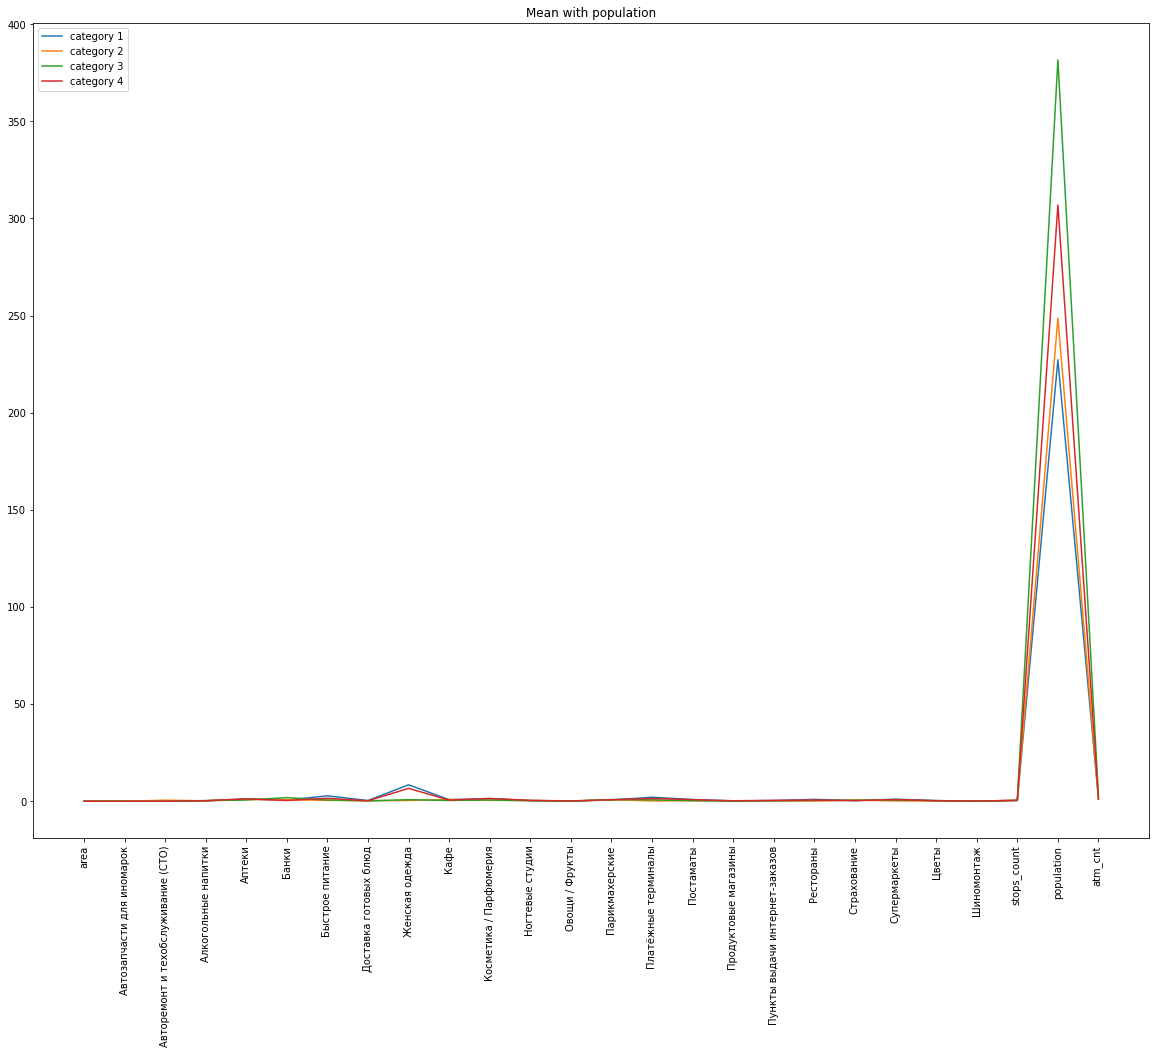

In [196]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.xticks(rotation=90)
# plot lines
plt.title('Mean with population')
plt.plot(cat1.index, cat1, label = "category 1")
plt.plot(cat2.index, cat2, label = "category 2")
plt.plot(cat3.index, cat3, label = "category 3")
plt.plot(cat4.index, cat4, label = "category 4")

plt.legend()
plt.show()


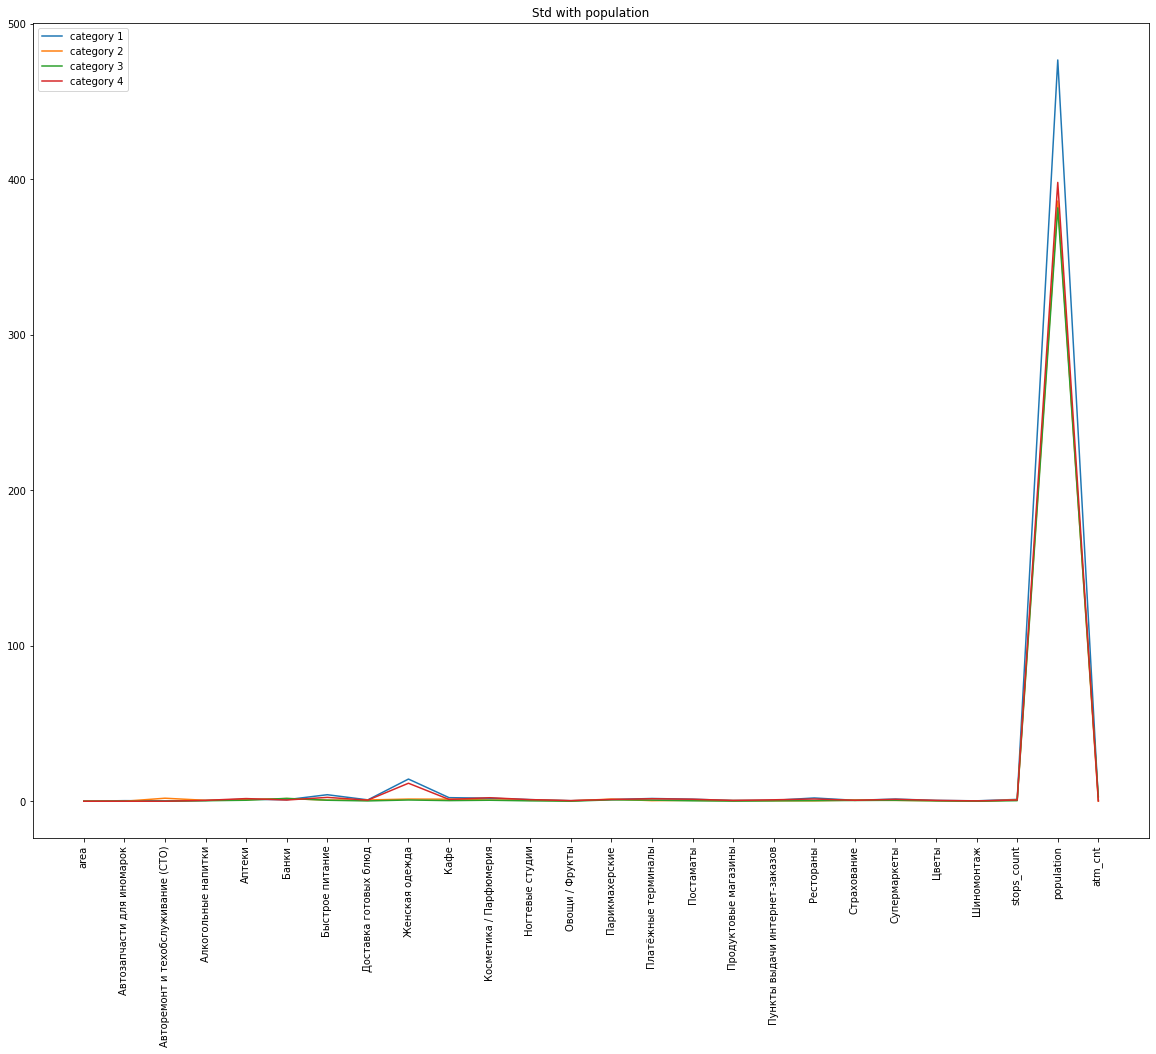

In [195]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.xticks(rotation=90)
plt.title('Std with population')
plt.plot(cat1_std.index, cat1_std, label = "category 1")
plt.plot(cat2_std.index, cat2_std, label = "category 2")
plt.plot(cat3_std.index, cat3_std, label = "category 3")
plt.plot(cat4_std.index, cat4_std, label = "category 4")

plt.legend()
plt.show()